## Notebook to find atoms.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/DTMicroscope/blob/main/notebooks/STEM/3_stem_atom_finding_COLAB-Hackathon.ipynb)


### Load libraries

In [28]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.9.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import sys
import os
%load_ext autoreload
%autoreload 2

if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    
    output.enable_custom_widget_manager()
    
sys.path.insert(0,'/Users/austin/Documents/GitHub/pyTEMlib')
import pyTEMlib
from pyTEMlib import probe_tools
print('pyTEM version: ',pyTEMlib.__version__)

sys.path.insert(0, '/Users/austin/Documents/GitHub/DTMicroscope')
from DTMicroscope.base.stem import DTSTEM

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
pyTEM version:  0.2024.09.1


In [2]:

ip = "11.11.000.123"

# DTMicroscope
microscope = DTSTEM(data_mode = 'simulation') # choice of 'simulation' or 'preloaded'
microscope.connect(ip, port = 9095)


0.03
0.03
Connected to Digital Twin


In [3]:
# the initialized state of the aberrations (realistic to the Spectra300)
microscope.optics['fov'] = 110

probe_tools.print_aberrations(microscope.aberrations)


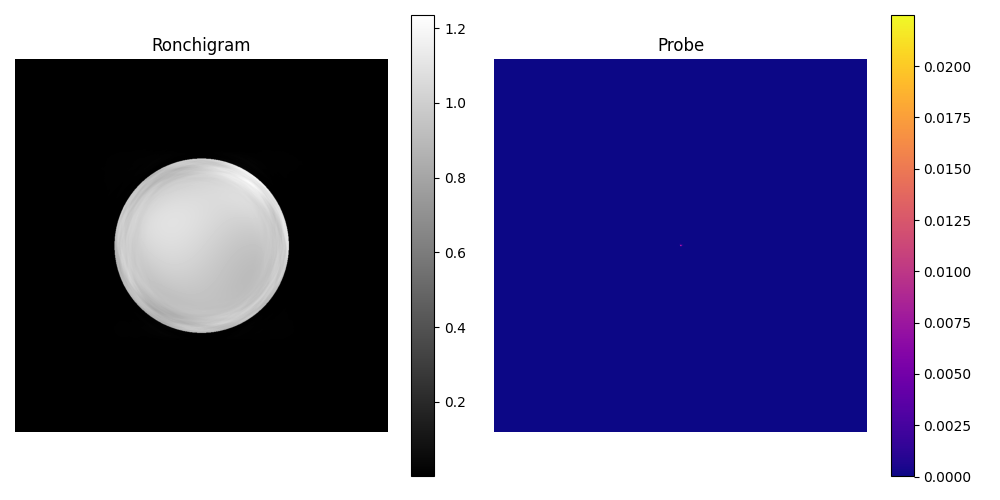

In [4]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

# View the Ronchigram
ax[0].set_title('Ronchigram')
ax[0].imshow(microscope.aberrations['ronchigram'], cmap = 'gray')
fig.colorbar(ax[0].imshow(microscope.aberrations['ronchigram'], cmap = 'gray'))

# View the Probe
ax[1].set_title('Probe')
ax[1].imshow(microscope.optics['probe'], cmap = 'gray')
fig.colorbar(ax[1].imshow(microscope.optics['probe'], cmap = 'plasma'))

for a in ax:
    a.axis('off')
fig.tight_layout()

(-0.5, 511.5, 511.5, -0.5)

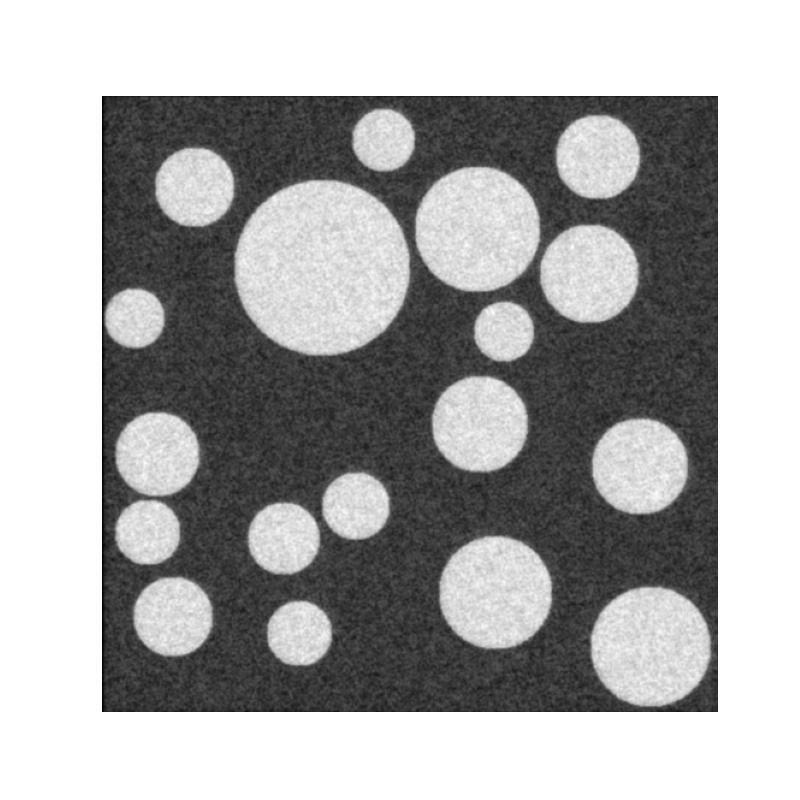

In [24]:
# This seed only applied to the circles, not the noise
image = microscope.get_scanned_image(size=512, dwell_time=1, detector='haadf', seed=None)

fig, ax = plt.subplots(1,1, figsize = (8,8))

ax.imshow(image, cmap = 'gray')
ax.axis('off')